In [7]:
with open('../data/data_a5/dr1.txt', mode='r', encoding='utf-8') as file:
    data = file.read()

In [8]:
import os

# load all the files in the directory
# 'files' becomes a list of all the file name strings
files = []
for file in os.listdir('../data/data_a5'):
    files.append(file)

In [9]:
userInput = str(input('Please enter a file name prefix:'))

# filter the list based on userInput
filteredFiles = []
for i in range(len(files)):
    if files[i].startswith(userInput):
        filteredFiles.append(files[i])

print(filteredFiles)

['dr1.txt', 'dr2.txt', 'dr3.txt', 'dr4.txt', 'dr5.txt', 'dr6.txt', 'dr7.txt', 'dr8.txt', 'dr9.txt', 'pk1.txt', 'pk2.txt', 'pk3.txt', 'pk4.txt', 'pk5.txt', 'pk6.txt', 'pk7.txt', 'pk8.txt', 'pk9.txt']


In [10]:
# convert a word to lower-case and remove all punctuation
def strip_word(w):
    w = w.lower()
    w = ''.join([i for i in w if i.isalpha()])
    return(w)

# sort dictionary from most to least frequent entry count
def sort_dictionary(D):
    Ds = sorted(D.items(), key=lambda x:x[1], reverse=True)               
    return Ds

# build a dictionary textDict for selected files
textDict = {}
counter = 0
for i in filteredFiles:
    with open('../data/data_a5/' + i, 'r', encoding='utf-8') as file:
        document = file.read()
        document = document.split('\n')
        for line in document:
            if len(line) > 0:
                words = line.split(' ')
                for word in words:
                    word = strip_word(word)
                    if len(word) != 0:
                        textDict[word] = textDict.get(word, 0) + 1
                        counter += 1

# this maps a function to the textDict value that applies (100/counter)*value for every kv pair
textDict = dict(map(lambda kv: (kv[0], kv[1]*(100/counter)), textDict.items()))
textDict = sort_dictionary(textDict)

# prints textDict
def printDictionary():
    for i in textDict:
        print(i)
printDictionary()

('the', 5.527388408390496)
('to', 2.9824038174768863)
('of', 2.907843722039964)
('and', 2.5052192066805845)
('a', 2.430659111243662)
('in', 1.7546475792822347)
('that', 1.7397355601948503)
('is', 1.3669350830102396)
('for', 0.9841932597673724)
('on', 0.8301023958643999)
('it', 0.8102197037478874)
('as', 0.7853663386022467)
('i', 0.6958942240779401)
('was', 0.6809822049905556)
('but', 0.6760115319614275)
('with', 0.6710408589322994)
('at', 0.5716273983497365)
('this', 0.5666567253206084)
('be', 0.5616860522914803)
('not', 0.5517447062332239)
('has', 0.521920668058455)
('have', 0.5020379759419425)
('are', 0.48712595685455806)
('my', 0.4523312456506611)
('an', 0.4324485535341485)
('its', 0.42747788050502034)
('which', 0.4075951883885078)
('by', 0.39268316930112335)
('he', 0.3877124962719952)
('trump', 0.3529177850680982)
('from', 0.34794711203897005)
('would', 0.3429764390098419)
('dartmouth', 0.33800576598071375)
('his', 0.3330350929515856)
('or', 0.3230937468933293)
('about', 0.30818172

In [15]:
import numpy as np
F1 = np.zeros((9,25))
F2 = np.zeros((9,25))

# select the top 25 words for all 18 documents. **This requires the user to enter: '' on the user input cell.
top25words = [kv[0] for kv in textDict[:25]]

# transpose frequency dict for a single document into F1 or F2
def buildF(doc, d, i, f):
    counter = 0
    with open('../data/data_a5/' + doc, 'r', encoding='utf-8') as file:
        document = file.read()
        document = document.split('\n')
        for line in document:
            if len(line) > 0:
                words = line.split(' ')
                for word in words:
                    word = strip_word(word)
                    if word in d:
                        d[word] = d.get(word, 0) + 1
                        counter += 1
    d = dict(map(lambda kv: (kv[0], kv[1]*(100/counter)), d.items()))
    d = sort_dictionary(d)

    # insert into F1/F2 based on word order from top25words
    for j, word in enumerate(top25words):
        wordFreq = 0
        for sortedWord, freq in d:
            if sortedWord == word:
                wordFreq = freq
                break
        f[i, j] = wordFreq

f1documents=['pk1.txt','pk2.txt','pk3.txt','pk4.txt','pk5.txt','pk6.txt','pk7.txt','pk8.txt','pk9.txt']
for i in range(len(f1documents)):
    pkFqDict = {}
    for word in top25words:
        pkFqDict[word] = 0
    buildF(f1documents[i], pkFqDict, i, F1)

f2documents=['dr1.txt','dr2.txt','dr3.txt','dr4.txt','dr5.txt','dr6.txt','dr7.txt','dr8.txt','dr9.txt']
for i in range(len(f2documents)):
    drFqDict = {}
    for word in top25words:
        drFqDict[word] = 0
    buildF(f2documents[i], drFqDict, i, F2)


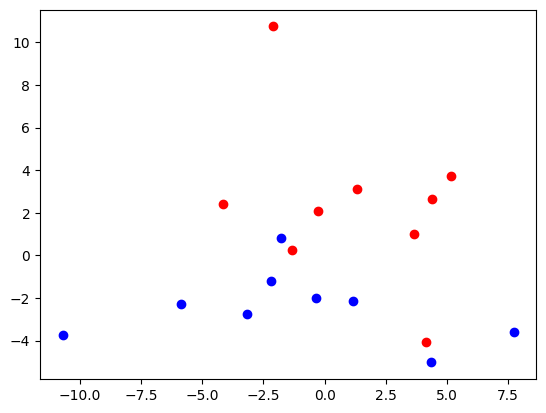

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

F   = np.concatenate((F1,F2),axis=0)
pca = PCA(n_components=2)
Fp  = pca.fit(F).transform(F)
plt.scatter( Fp[0:9,0], Fp[0:9,1], color='b')
plt.scatter( Fp[9:18,0], Fp[9:18,1], color='r' )